# Car (Re-)Selling Price Prediction

## Setting up the environments

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

Source : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
<br>
Here I will be using original version of the data.

In [266]:
df = pd.read_csv("car data v1.csv")
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


## Exploratory Data Analysis (EDA)

In [267]:
#shape of the data
df.shape

(301, 9)

There are 20 variables and 2059 instances of car.

In [268]:
#explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Check for Missing values**

In [269]:
#Observing frequency of missing values across rows
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values in the dataset.

**Cleaning invalid values** <br>
By mere inspection of the data, values look fine.

In [270]:
#unique values for each variable
for col in df.columns:
    print(col, df[col].unique())
    print()

Car_Name ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'He

Also, note that selling price and present price are mentioned in lakhs INR.

**Exploring type of the variable**

In [271]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [272]:
#count unique values for each variable
for col in df.columns:
    print(col, df[col].nunique())

Car_Name 98
Year 16
Selling_Price 156
Present_Price 147
Kms_Driven 206
Fuel_Type 3
Seller_Type 2
Transmission 2
Owner 3


Variables Selling_Price, Kms_Driven, Present_Price and Year are numeric values.
<br>Fuel Type, Transmission, Seller_Type, Owner are categories.
<br>Car_Name be string.

In [273]:
#setting variables to appropriate variable types
df.Car_Name = df.Car_Name.astype('category')

df.Year = df.Year.astype('int')
df.Present_Price = df.Present_Price.astype('float')
df.Selling_Price = df.Selling_Price.astype('float')
df['Kms_Driven'] =  df['Kms_Driven'].astype('float')

df['Transmission'] = df['Transmission'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Owner'] = df['Owner'].astype('category')
df['Seller_Type'] = df['Seller_Type'].astype('category')

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    float64 
 5   Fuel_Type      301 non-null    category
 6   Seller_Type    301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    category
dtypes: category(5), float64(3), int64(1)
memory usage: 14.3 KB


In [275]:
df.Year.describe()

count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64

**Extracting Features**

Year variable denotes the year the car was bought. More useful feature will be number of years passed since the car was bought, i.e. how old the car is. 
<br>As the data is collected in the year 2020, we will calculate the age of the car with respect to 2020.

In [276]:
current_year = 2020
df['Used Year'] = current_year - df['Year']
df['Used Year'] = df['Used Year'].astype('int')
#df.drop(columns=['Year'], inplace=True)
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Used Year
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,3


**Descriptive Statistics**

In [277]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Used Year
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,6.372093
std,2.891554,5.082812,8.644115,38886.883882,2.891554
min,2003.000000,0.100000,0.320000,500.000000,2.000000
25%,2012.000000,0.900000,1.200000,15000.000000,4.000000
50%,2014.000000,3.600000,6.400000,32000.000000,6.000000
75%,2016.000000,6.000000,9.900000,48767.000000,8.000000
max,2018.000000,35.000000,92.600000,500000.000000,17.000000


- Price : The average selling price of a used car is 4.66 lakhs INR, while the average present price is 7.63 lakhs INR. 
- Year : Ranges from 2003 to 2018. Looking at quartile range, we can say that most of the cars are from recent years (within a decade)
- Kilometer - Minimum distance traveled by the cars is 500 km while maximum is 500000 km.
- The average age of the used cars is 6.37 years, with a standard deviation of 2.89 years. The minimum and maximum ages are 2 years and 17 years, respectively.
- The minimum and maximum selling and present prices are very different, indicating that there might be some outliers in the dataset.

In [278]:
df.describe(include=['category'])

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301,301,301,301
unique,98,3,2,2,3
top,city,Petrol,Dealer,Manual,0
freq,26,239,195,261,290


- There are 98 unique car names present in the dataset.
- The dataset contains 3 types of fuel: petrol, diesel, and CNG, with petrol being the most common fuel type.
- The dataset contains 2 types of seller: dealer and individual, with dealers being the most common seller type.
- The dataset contains 2 types of transmission: manual and automatic, with manual being the most common transmission type.
- The dataset contains 3 types of owners: 0, 1, and 3, with 0 being the most common owner type, indicating that most cars for sale have not changed hands frequently.

In [279]:
#Final Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    float64 
 5   Fuel_Type      301 non-null    category
 6   Seller_Type    301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    category
 9   Used Year      301 non-null    int64   
dtypes: category(5), float64(3), int64(2)
memory usage: 16.7 KB


**Visualizing Trends**

[]

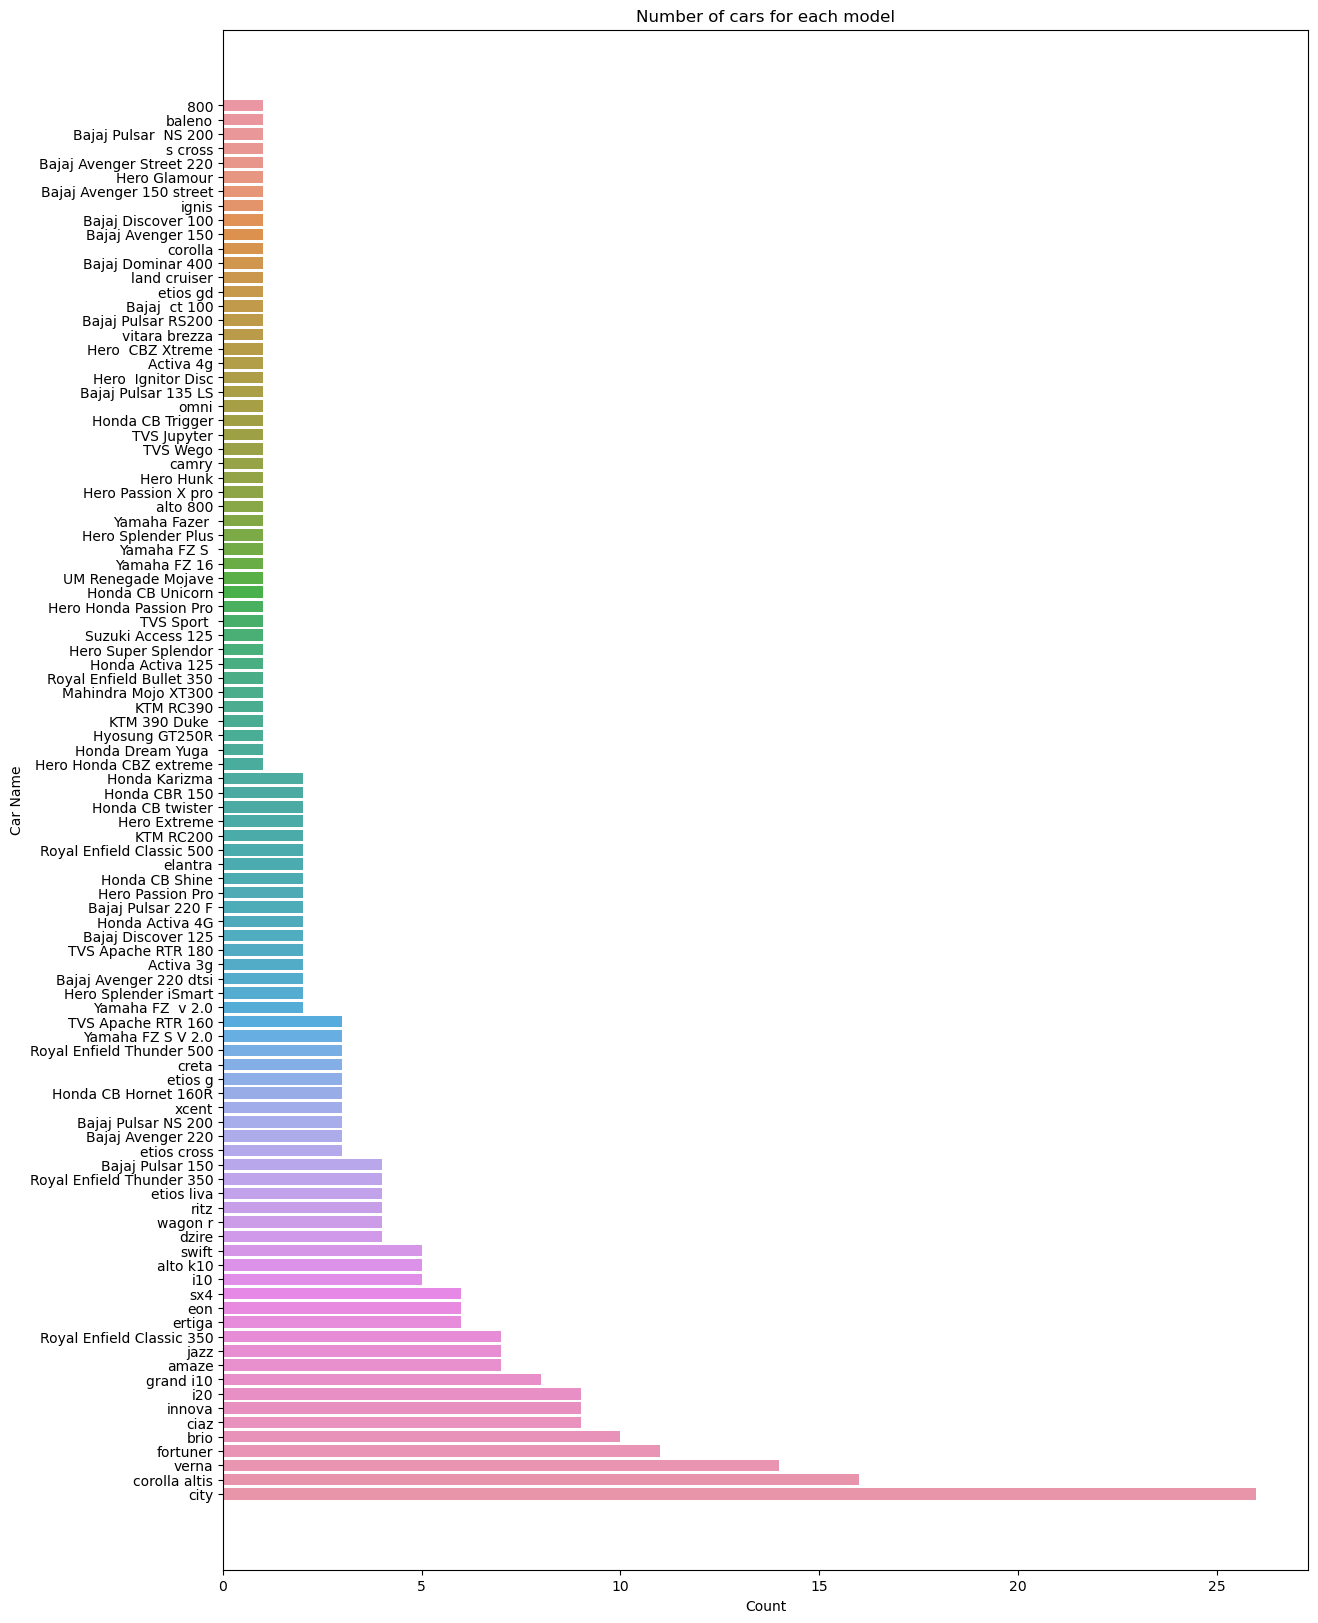

In [280]:
#Frequency of cars with respect to the Make
plt.figure(figsize=(14,20))
sorted_df = df['Car_Name'].value_counts().sort_values(ascending=True)
sns.countplot(y="Car_Name", data=df, orient='h', order=sorted_df.index)
plt.title('Number of cars for each model')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.plot()

The car name distribution is highly imbalanced. Cars like city, verna, corolla altis are is higher numbers compared to most of the cars in the dataset.

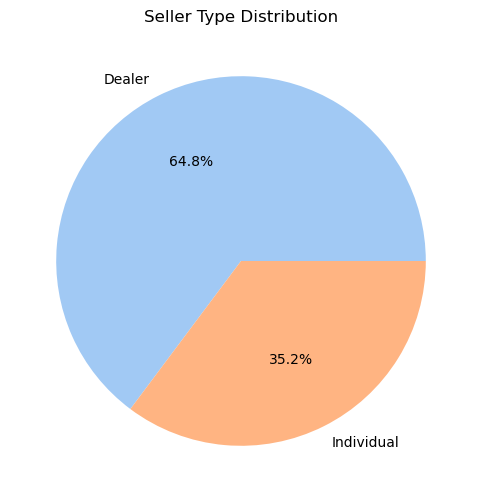

In [281]:
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(df.Seller_Type.value_counts(), labels=df.Seller_Type.value_counts().index, autopct="%1.1f%%")
plt.title("Seller Type Distribution")
plt.show()

Dataset contains more number of dealers compared to individuals.

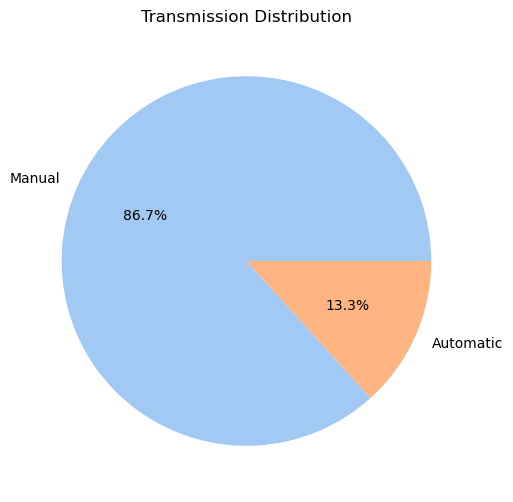

In [282]:
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(df.Transmission.value_counts(), labels=df.Transmission.value_counts().index, autopct="%1.1f%%")
plt.title("Transmission Distribution")
plt.show()

Most of the cars have Manual transmission compared to Automatic.

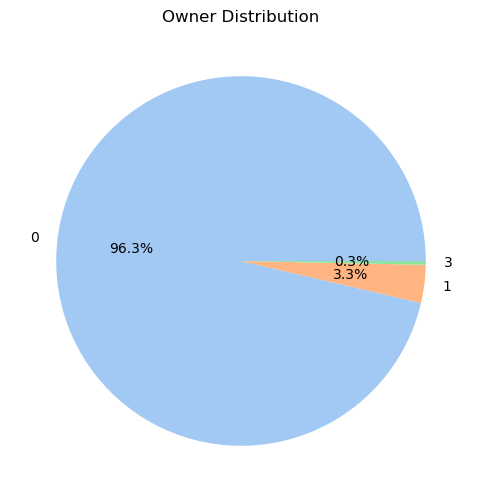

In [283]:
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(df.Owner.value_counts(), labels=df.Owner.value_counts().index, autopct="%1.1f%%")
plt.title("Owner Distribution")
plt.show()

Most of the cars have zero owners, around 3% has 1 owner while 0.3% has 3 owners.

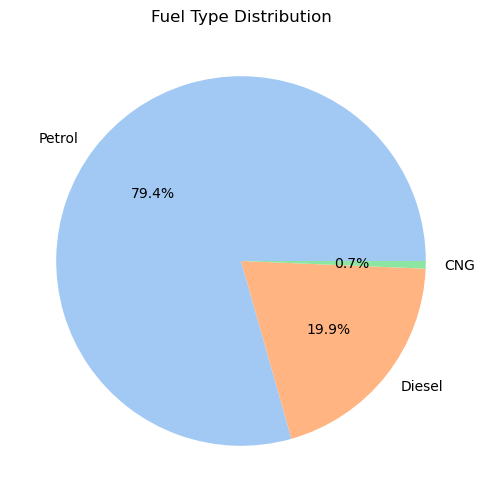

In [284]:
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
plt.pie(df.Fuel_Type.value_counts(), labels=df.Fuel_Type.value_counts().index, autopct="%1.1f%%")
plt.title("Fuel Type Distribution")
plt.show()

Maximum car uses Petrol, followed by Diesel then CNG.

[]

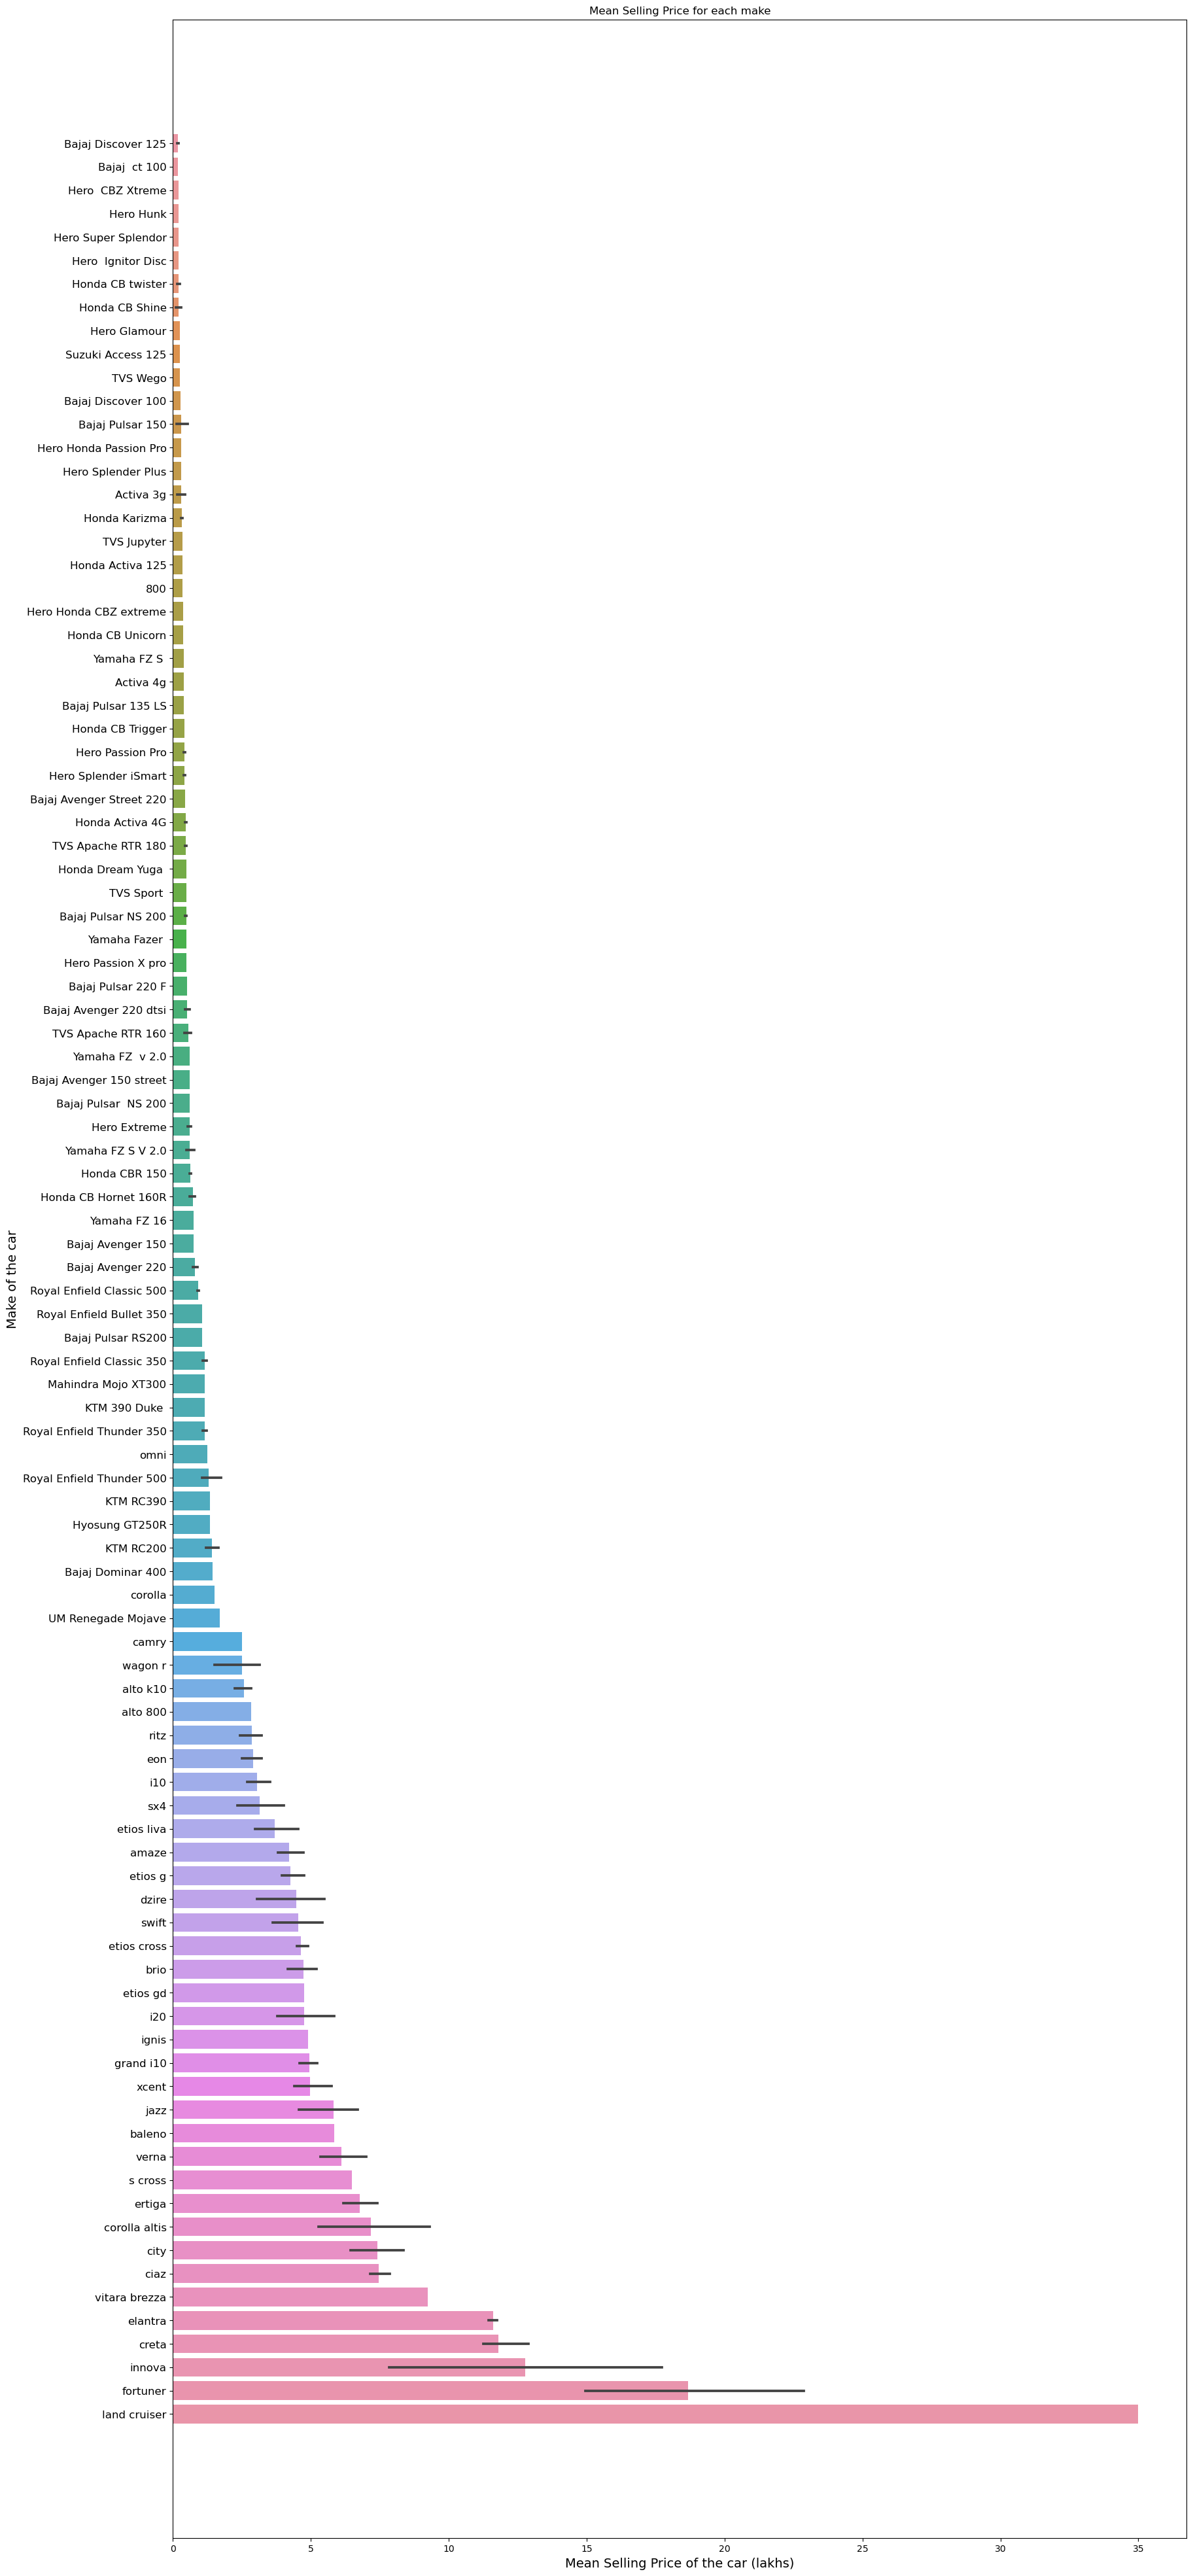

In [285]:
plt.figure(figsize=(20,50))
ax = sns.barplot(x=df["Selling_Price"], y=df.Car_Name, order=df.groupby("Car_Name")["Selling_Price"].mean().sort_values(ascending=True).index)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel("Selling_Price", fontsize=14)
ax.set_ylabel("Car_Name", fontsize=14)
plt.title('Mean Selling Price for each make')
plt.xlabel('Mean Selling Price of the car (lakhs)')
plt.ylabel('Make of the car')
plt.plot()

Though the number of high end cars is less, but the average selling prices of these car makes are very high compared to rest of the makes.

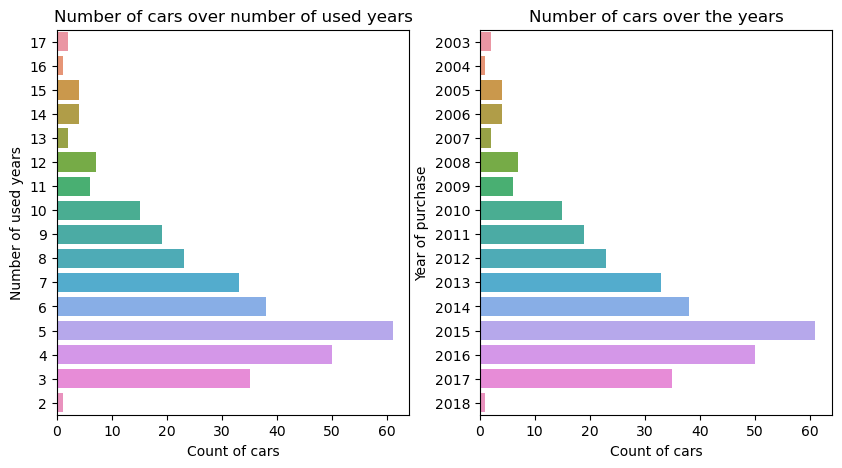

In [286]:
fig,ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(y="Used Year", data=df,  order=np.sort(df["Used Year"].unique())[::-1], orient='h', ax=ax[0])
ax[0].set_title('Number of cars over number of used years')
ax[0].set_xlabel('Count of cars')
ax[0].set_ylabel('Number of used years')

sns.countplot(y="Year", data=df, orient='h', ax=ax[1])
ax[1].set_title('Number of cars over the years')
ax[1].set_xlabel('Count of cars')
ax[1].set_ylabel('Year of purchase')
plt.show()

Most of the cars are recently bought within a decade.
<br> Cars older than 10 years are low in quantity.

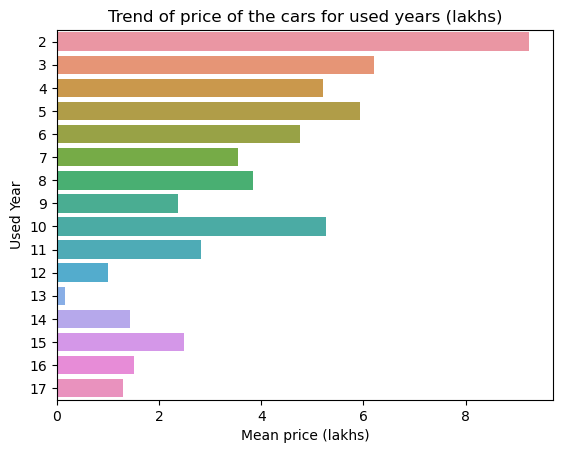

In [287]:
df_temp = df['Selling_Price'].groupby(df['Used Year']).mean()
df_temp = df_temp.reset_index()
df_temp.columns = ['Used Year', 'Mean']
sns.barplot(y=df_temp['Used Year'], x=df_temp['Mean'], orient='h')
plt.title("Trend of price of the cars for used years (lakhs)")
plt.xlabel("Mean price (lakhs)")
plt.show()

Cars which are used for less number of years are expensive as compared to the cars which are older. 

Text(0, 0.5, 'Selling price in lakhs')

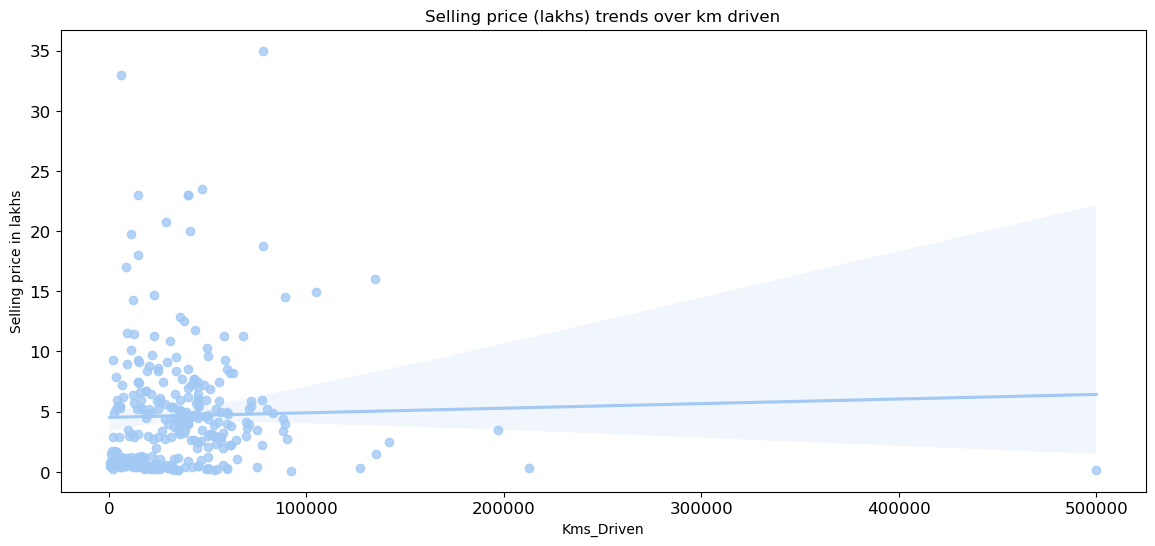

In [288]:
plt.figure(figsize=(14,6))
ax=sns.regplot(x=df['Kms_Driven'], y=df['Selling_Price'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title("Selling price (lakhs) trends over km driven")
ax.set_ylabel("Selling price in lakhs")

Most of the car are driven under 100K kms with few outlieres greater than that.
<br> Let's zoom over the the majority of the data to understand the trends.

Text(0, 0.5, 'Selling price in lakhs')

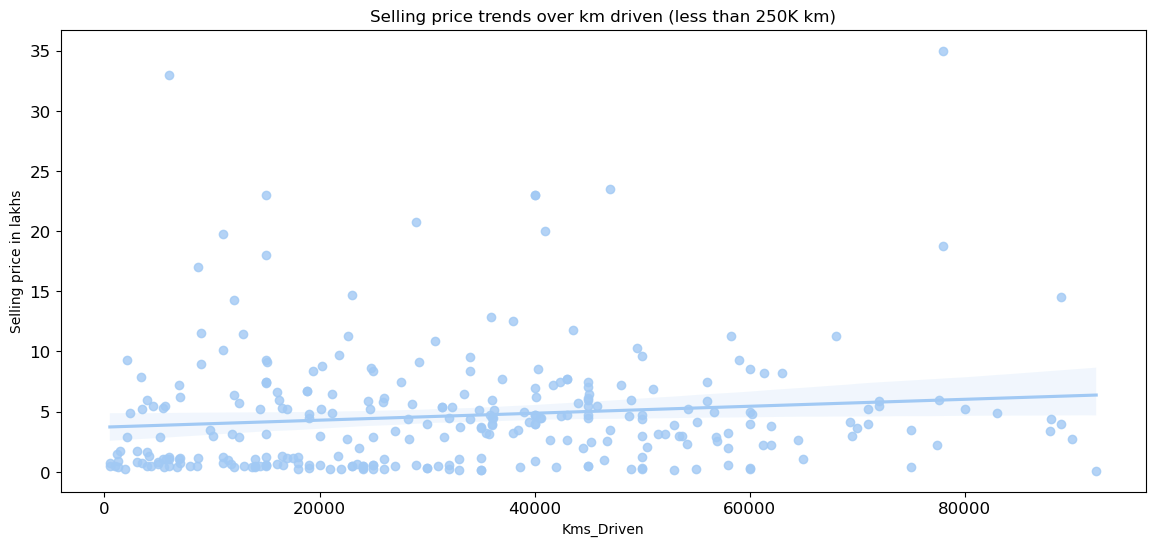

In [289]:
df_temp = df[df['Kms_Driven'] < 100000]
plt.figure(figsize=(14,6))
ax=sns.regplot(x=df_temp['Kms_Driven'], y=df_temp['Selling_Price'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title("Selling price trends over km driven (less than 250K km)")
ax.set_ylabel("Selling price in lakhs")

We can see that as the kms increases, the selling price of the car decreases.

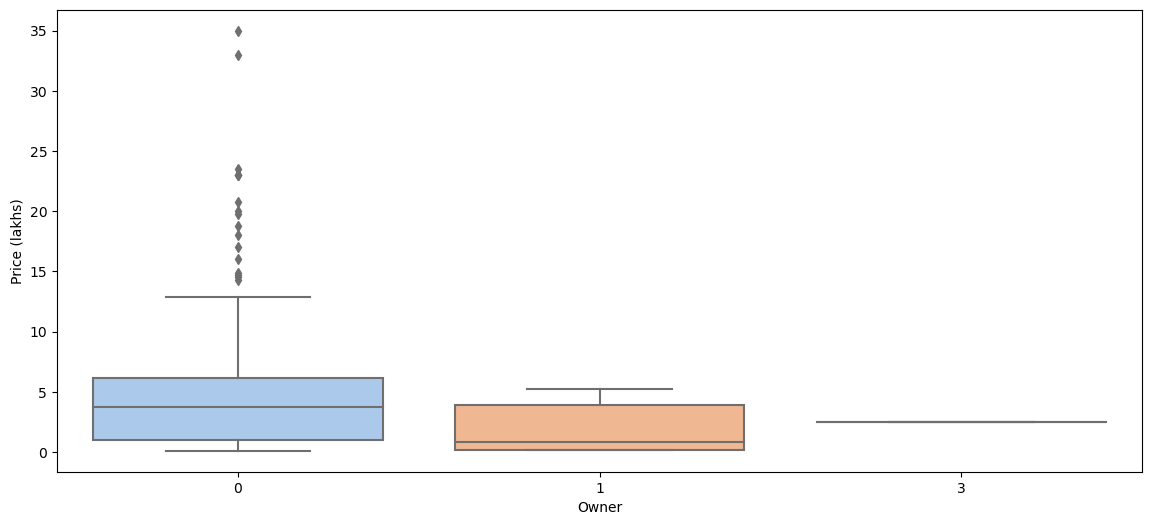

In [290]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df.Owner, y=df['Selling_Price'])
plt.xlabel("Owner")
plt.ylabel("Price (lakhs)")
plt.show()

The selling price of the cars with no previous owners is high and shows a downward trend with as owners increases.

Text(0.5, 1.0, 'Selling price (lakhs) trend over Fuel Type')

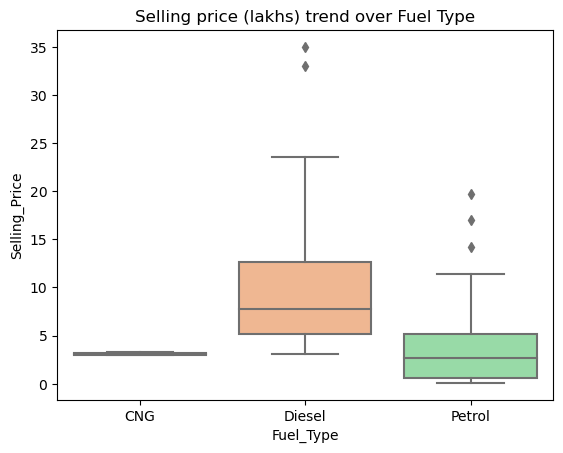

In [291]:
sns.boxplot(x=df['Fuel_Type'], y=df.Selling_Price)
plt.title("Selling price (lakhs) trend over Fuel Type")

Petrol and Diesel cars have greater range prices compared to CNG. The mean price of the diesel is highest.

Text(0.5, 1.0, 'Price vs Transmission without outliers')

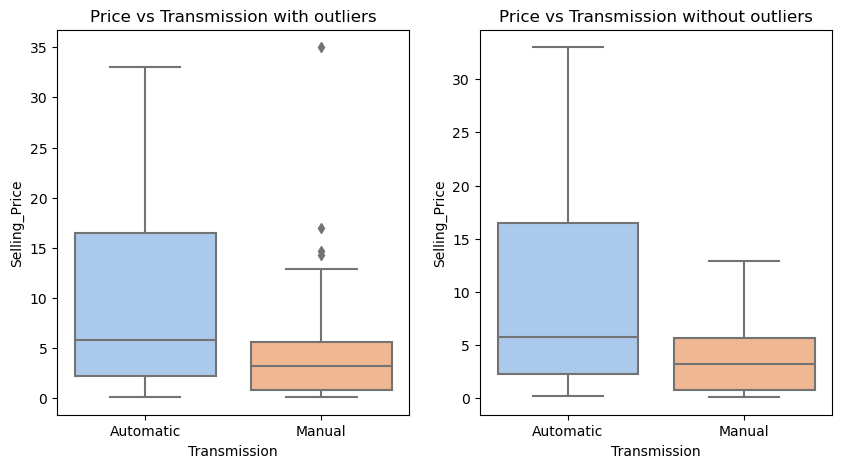

In [292]:
fig,ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x="Transmission", y="Selling_Price", data=df, showfliers=True,ax=ax[0])
ax[0].set_title("Price vs Transmission with outliers")
sns.boxplot(x="Transmission", y="Selling_Price", data=df, showfliers=False,ax=ax[1])
ax[1].set_title("Price vs Transmission without outliers")

Selling Price of Automatic Transmission is higher as compared to Manual Transmission.

### Correlation between the data features

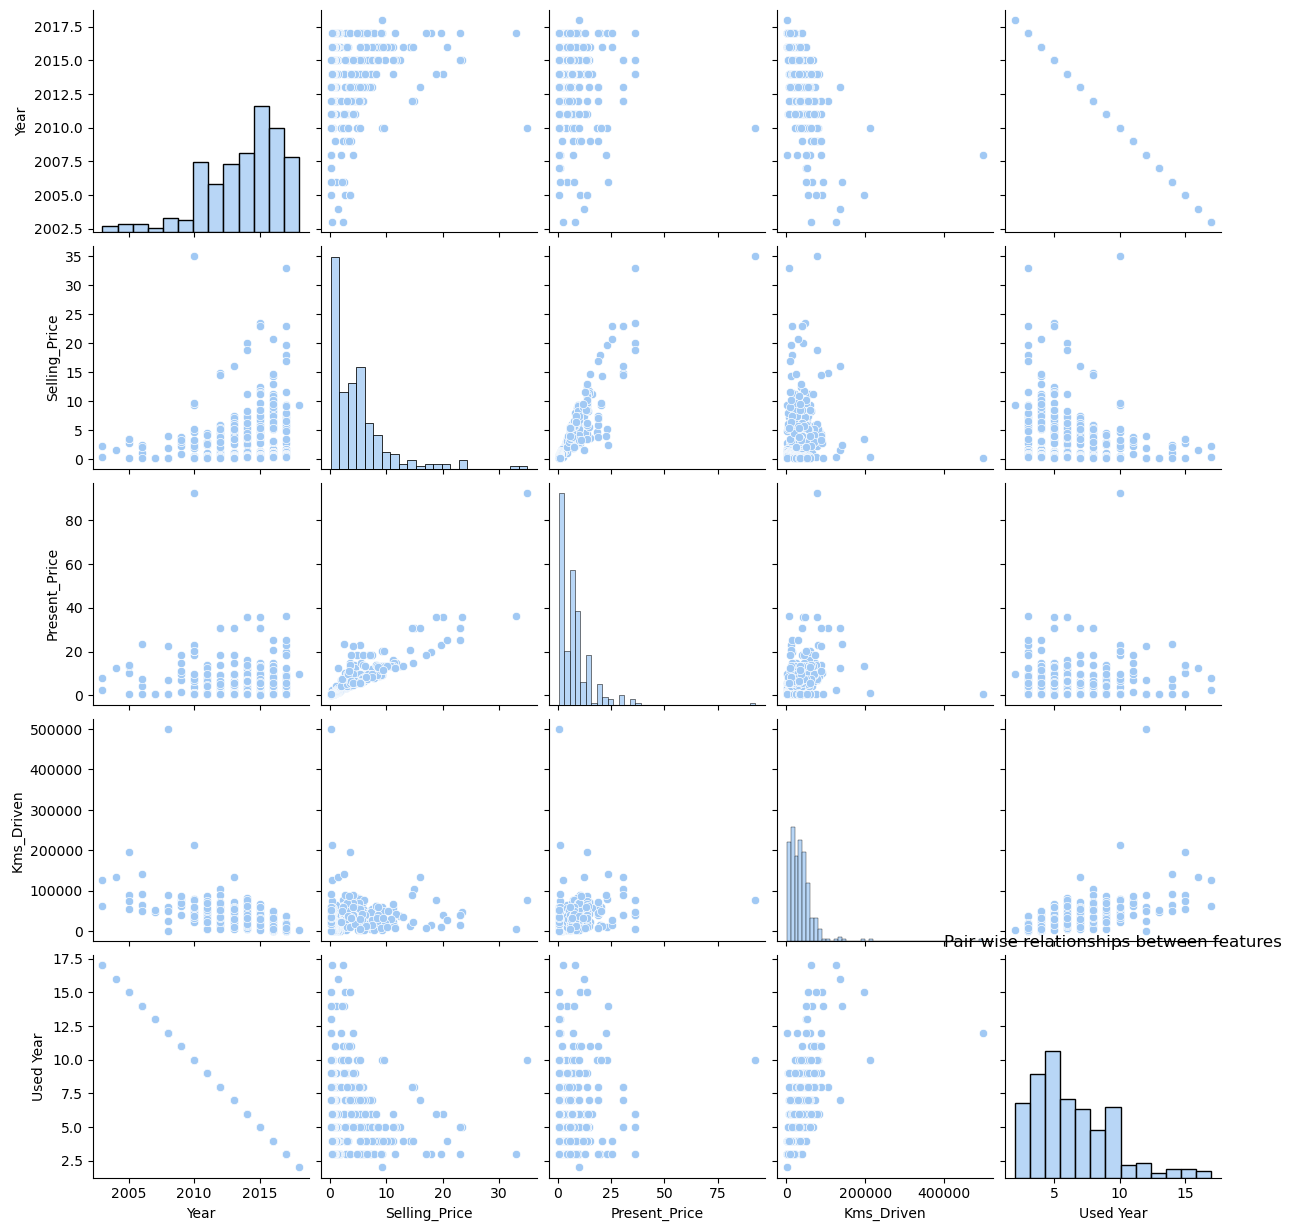

In [293]:
#pairplot
sns.pairplot(df) #diag_kind="hist"
plt.title("Pair wise relationships between features")
plt.show()

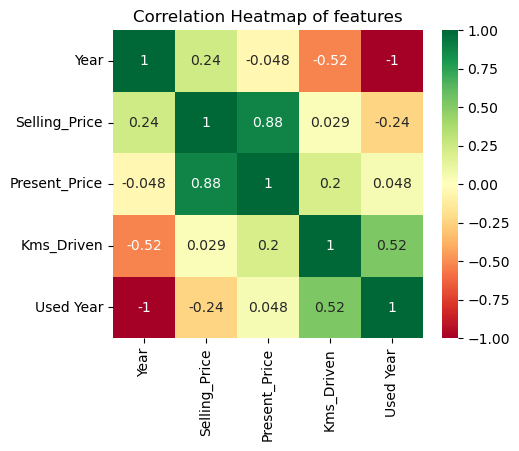

In [323]:
#find correlation
corr = df.corr() 
top_corr_features = corr.index 
plt.figure(figsize=(5,4)) 
#plot the heat map 
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap of features")
plt.show()

- Since "Used Year" is derived from "Year" variable, we observe a strong relationship between the two. We will drop the Year variable as the information it contained is transferred to "Used Year".
- Also, there is some linear relationship between present price and selling price.

### Partitioning

In [295]:
#year and car name are not necessary feature so we drop them
X = df.drop(columns=['Selling_Price', 'Year', 'Car_Name'])
#price is target
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_col = X_train.columns
X_train.shape, X_test.shape

((240, 7), (61, 7))

We have total 8 features for predicting the selling price of the car. <br>
Since data is small, we divide it into 80:20 as train and test data. <br>
We have 240 samples for training and 61 samples for testing.

### Encoding and Normalization

Encoding and Normalization are two important preprocessing steps in machine learning.
- Encoding is the process of converting categorical data into numerical values that can be used by machine learning algorithms.
- Normalization is the process of scaling numerical data so that all the features are on the same scale. This is important because some machine learning algorithms are sensitive to the scale of the features.

**Normalization**

In [296]:
numeric_cols = X_train.select_dtypes(include='number').columns
numeric_cols

Index(['Present_Price', 'Kms_Driven', 'Used Year'], dtype='object')

In [297]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

**Encoding categorical features**

In [298]:
categories = X_train.select_dtypes(include=['category']).columns
categories.tolist()

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

We have 5 categorical features in our dataset. 
Let's identify the nature of the category to perfom appropriate encoding.

In [299]:
for col in categories.tolist() : 
    print(col, "\n", df[col].cat.categories)
    #print( col, " : \n",X_train[col].unique())
    print()

Fuel_Type 
 Index(['CNG', 'Diesel', 'Petrol'], dtype='object')

Seller_Type 
 Index(['Dealer', 'Individual'], dtype='object')

Transmission 
 Index(['Automatic', 'Manual'], dtype='object')

Owner 
 Int64Index([0, 1, 3], dtype='int64')



Nominal Categories : since there is no inherent ordering in them : 
- Transmission
- Fuel_Type
- Seller_Type

Ordinal Categories : 
- Owner
The "Owner" variable can be considered ordinal as it has a specific order of values:<br>
No Owner (0), First, Second, Third, etc

**Ordinal Encoding**

In [300]:
# create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[[0, 1, 2, 3]])

# encode the 'Owner' column
X_train['Owner'] = ordinal_encoder.fit_transform(X_train[['Owner']])
X_test['Owner'] = ordinal_encoder.transform(X_test[['Owner']])

**Nominal Encoding**

In [301]:
X_train.shape

(240, 7)

In [302]:
#nominal categories to encode
one_cat = ['Seller_Type','Fuel_Type','Transmission']

# Fit and transform the categorical feature(s)
X_train = pd.get_dummies(X_train, columns=one_cat, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_cat, drop_first=True)
columns = X_train.columns
X_train.shape

(240, 8)

Before encoding we had 8 variables, after encoding we have 9. <br>
Two categories Transmission and Seller_Type are binary variables, so they are encoded with one column. <br>
Third category Fuel_Type has 3 values so they need two columns.

### Feature Importance

Extra Trees Regressor is a variation of the Random Forest algorithm, where the trees are built with random thresholds for each feature rather than searching for the best thresholds. This results in a more randomized decision boundary and can lead to better generalization performance, especially when dealing with high-dimensional data like in our case.

In [303]:
et_model = ExtraTreesRegressor()
et_model.fit(X_train, y_train)

ExtraTreesRegressor()

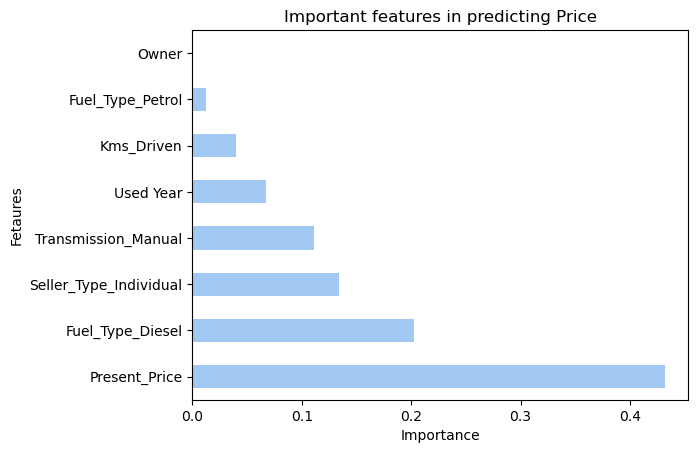

In [304]:
ft = pd.Series(et_model.feature_importances_, index= columns)
t = ft.nlargest(8).plot(kind='barh')
plt.title("Important features in predicting Price")
plt.ylabel("Fetaures")
plt.xlabel("Importance")
plt.show()

In [305]:
ft.nlargest(8)

Present_Price             0.431874
Fuel_Type_Diesel          0.202626
Seller_Type_Individual    0.134251
Transmission_Manual       0.111563
Used Year                 0.066836
Kms_Driven                0.039755
Fuel_Type_Petrol          0.012730
Owner                     0.000364
dtype: float64

'Present Price' has the highest importance value of 0.43, suggesting that it is the most important feature in predicting the target - 'Selling Price'.
<br>
Other top important features are "Fuel Type", "Seller Type" and "Transmission".

### Model

Our Target variable is Selling Price i.e. continuous variable. So our problem is a Regression task.

In [306]:
#hyper parameter list
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_leaf = [1, 2, 5, 10]
min_samples_split = [2, 5, 10, 15, 100]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#random forest regression
model_rf = RandomForestRegressor()
model_rf = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1, return_train_score=True)
model_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [307]:
#hyper parameter tuning - best model parameters
model_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [308]:
#best score for best parameters
model_rf.best_score_

-4.652419704244083

The negative MSE of -4.6 indicates that the model has performed well in terms of predicting the target variable, with lower squared differences between predicted and actual values.

In [309]:
cv_results = pd.DataFrame(model_rf.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
5,-0.630785,0.140778,-4.652420,3.724385
9,-2.686382,0.183696,-5.257881,1.193673
3,-2.920452,0.365011,-5.280606,1.723737
1,-3.740619,0.537712,-5.906753,4.071841
8,-3.960778,0.564056,-6.252302,4.203874


- Combinations 1, 3, 5 have smaller differences between mean_train_score and mean_test_score, indicating potentially better generalization. 
- Combinations 3, 7, 9 have relatively smaller std_test_score values, indicating more consistent performance on the test data.

Now let's train the model on the entire Train set using best parameters.

In [310]:
best_params = model_rf.best_params_
model_rf_best = RandomForestRegressor(**best_params)
model_rf_best

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

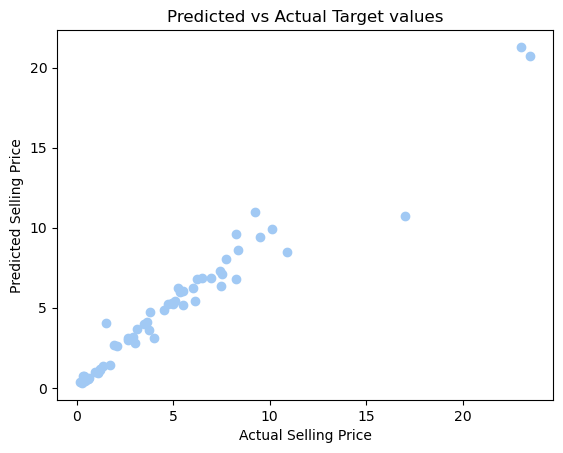

In [311]:
model_rf_best = model_rf_best.fit(X_train,y_train)
y_pred = model_rf_best.predict(X_test)
plt.scatter(y_test, y_pred)
plt.title("Predicted vs Actual Target values")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.show()

A positive correlation between the actual and predicted prices indicates that the model is able to capture the underlying patterns and trends in the data, leading to accurate predictions. A narrower spread indicates higher precision and consistency in the predictions.

In [312]:
t = pd.DataFrame(y_test).reset_index(drop=True)
t.columns = ['Actual Price']
t2 = pd.DataFrame(y_pred)
t2.columns = ['Pred Price']
res_df = pd.concat([X_test.reset_index(drop=True),t], axis=1 )
res_df = pd.concat([res_df, t2], axis=1 )
res_df.columns.values[0:8] = columns
res_df

,Present_Price,Kms_Driven,Owner,Used Year,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Actual Price,Pred Price
0,-0.773656,-0.323442,0.0,-0.809076,1,0,1,0,0.35,0.767610
1,0.678479,-0.635185,0.0,-0.809076,0,0,1,1,10.11,9.915030
2,0.210408,0.538523,0.0,0.580393,0,1,0,1,4.95,5.275860
3,-0.773656,-0.060064,1.0,0.927760,1,0,1,1,0.15,0.333750
4,1.236821,0.059678,0.0,0.233025,0,0,1,1,6.95,6.831200
...,...,...,...,...,...,...,...,...,...,...
56,-0.201941,-0.790531,0.0,-0.461709,0,0,1,1,5.50,5.196730
57,0.455588,-0.084294,0.0,-0.809076,0,1,0,1,9.50,9.447160
58,0.009806,0.310007,0.0,2.664595,0,0,1,1,2.10,2.604440
59,0.110107,-0.537520,0.0,-0.809076,0,0,1,0,7.40,7.306218


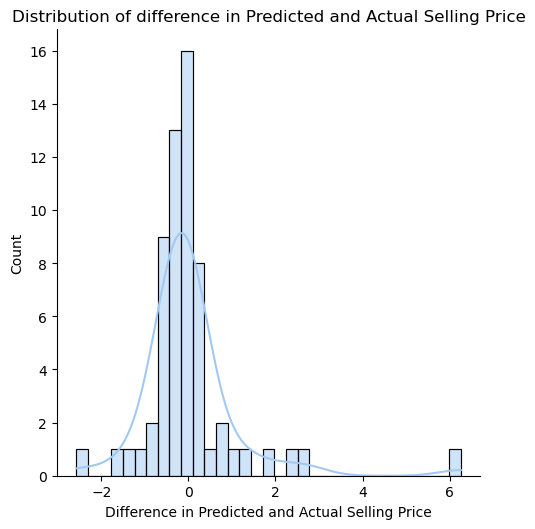

In [313]:
sns.displot(res_df['Actual Price'] - res_df['Pred Price'], kde=True)
plt.title("Distribution of difference in Predicted and Actual Selling Price")
plt.xlabel("Difference in Predicted and Actual Selling Price")
plt.show()

The difference between the actual and predicted selling prices is minimal for maximum data points.

**Evaluation - Rsquared**

In [314]:
r2 = r2_score(res_df['Actual Price'], res_df['Pred Price'])
print(f" R-squared : {round(r2,2)} ")

 R-squared : 0.94 


A R-squared value of 0.94 indicates that the independent variables in the model explain approximately 94% of the variance in the dependent variable i.e. 0.94 indicates a very strong relationship between the independent variables and the dependent variable, indicating a good fit for the model

**Evaluation - MSE**

In [315]:
mse = mean_squared_error(res_df['Actual Price'], res_df['Pred Price'])
print(f"Mean Squared Error : {round(mse,2)} ")

Mean Squared Error : 1.28 


A mean squared error (MSE) value of 1.28 suggests the average squared difference between the predicted values and the actual values is 1.28. A lower MSE indicates better model performance, as it implies that the model's predictions are closer to the actual values.

### Model Deployment

For final deployment, let's use the entire dataset (train and test set) to train the model with the best parameters we have found by evaluation.  

In [316]:
#merging train and test set
df_X = pd.concat((X_train, X_test), axis=0)
df_y = pd.concat((y_train, y_test), axis=0)
df_X.shape, df_y.shape

((301, 8), (301,))

In [317]:
#initializing the model with best parameters
model_rf_final = RandomForestRegressor(**best_params)
model_rf_final

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [318]:
#training the model with the entire data
model_rf_final = model_rf_final.fit(df_X, df_y)

In [319]:
#saving the model for deployment
file = open('regression_rf_model.pkl', 'wb')
pickle.dump(model_rf_final,file)